In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.stats import *

%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [60]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [61]:
 def cosine (x, y):
        return np.dot(x, y) / np.linalg.norm(x) / np.linalg.norm(y)

In [64]:
result = []
for rating in raitings:    # Организуем 2 цикла
    max_cosine = 0
    best_candidate = np.full(15, 0)
    for rating2 in raitings:
        if not (rating2 == rating).all():    # пары с самим собой исключаем
            if cosine(rating, rating2) > max_cosine:    # Находим максимальный косинус
                max_cosine = cosine(rating, rating2)    # И запоминаем его и соотв. вектор
                best_candidate = rating2
    result.append([rating, best_candidate])    # Результат в виде списка из списков пар векторов
for i in range(10):
    print(f"{i}: {result[i]}")

0: [array([ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6]), array([ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4])]
1: [array([ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7]), array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6])]
2: [array([ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6]), array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10])]
3: [array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]), array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10])]
4: [array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6]), array([ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4])]
5: [array([ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1]), array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10])]
6: [array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2]), array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7])]
7: [array([ 4,  1,  6,  4,  3, 10,  

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [65]:
# При наличии достаточного времени
# я бы применил бы метод PCA (Principal Component Analysis) для уменьшения размерности пространства признаков

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [22]:
# Вычислим производную численным методом:
from scipy.misc import derivative

def f(x):
    return np.tan(np.sin(x) + np.cos(2*x + 3))
print(f"Первая производная, численный метод: {derivative(f, 1.0, dx=1e-6)}")

# Вычислим производную ф-ии на "бумаге":
def f_prime(x):
    return (1 + np.tan(np.sin(x) + np.cos(2*x + 3))**2) * (np.cos(x) - 2 * np.sin(2*x + 3))
print(f"Первая производная, ручной метод:    {f_prime(1)}")

# Проверим правильность определения производной ф-ии символьным методом c помощью sympy:
from sympy import *

x = symbols ('x')
diff(tan(sin(x) + cos(2*x + 3)))

Первая производная, численный метод: 13.229408346360216
Первая производная, ручной метод:    13.229408344165076


(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**

In [161]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [162]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [163]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [164]:
def error_f(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [173]:
bounds = [(-100, 100), (-100, 100)]
result = differential_evolution(error_f, bounds, seed=42)
print(f"Оптимальные параметры: {result.x}")

Оптимальные параметры: [  2.99999999 -50.25220833]


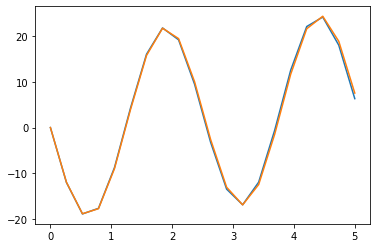

In [168]:
plt.plot(x, fx)
plt.plot(x, f(x, 3, -50.24))    # Проверим на графике, немного изменив полученные коэффициенты
plt.show()

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

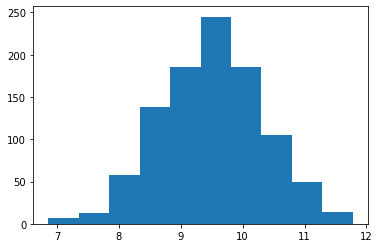

In [60]:
my_data_mean_values = []
for i in range(1000):
    my_data = np.random.choice(20, 50)
    my_data_mean_values.append(np.mean(my_data))

plt.hist(my_data_mean_values)
plt.show()

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)  
[[1, 4],  
[1, 1]]  

In [21]:
m5 = np.array([[1, 4],
[1, 1]])
print(m5)
m5eig = np.linalg.eig(m5)
print(f"Собственные значения: {round(m5eig[0][0], 1)} и {round(m5eig[0][1], 1)}")
print(f"Собственные векторы:\n {m5eig[1]}")

[[1 4]
 [1 1]]
Собственные значения: 3.0 и -1.0
Собственные векторы:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


**На "бумаге":**  
решаем уравнение (1-λ)(1-λ) - 4 = 0  
т.е. λ\*\*2 - 2\*λ - 3 = 0  
отсюда cобственные значения λ<sub>1</sub> = 3 и λ<sub>2</sub> = -1  

собственный вектор №1 из уравнений -2x + 4y = 0 и x - 2y = 0  
т.е. x = 2y  
т.е. вектор-столбец (2, 1)  

собственный вектор №2 из уравнений 2x + 4y = 0 и x + 2y = 0  
т.е. x = -2y  
т.е. вектор-столбец (-2, 1)  